In [1]:
import torch

from reggae.gp.variational import SingleLinearLFM, ExponentialLFM
from reggae.gp.variational import Trainer
from reggae.data_loaders import load_barenco_puma
from reggae.utilities import save, load
from reggae.plot.variational_plotters import Plotter

from matplotlib import pyplot as plt
import numpy as np

f64 = np.float64

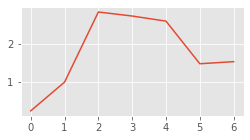

In [2]:
replicate = 0 #TODO: for now we are just considering the first replicate

m_observed, f_observed, σ2_m_pre, σ2_f_pre, t = load_barenco_puma('../data/')

m_df, m_observed = m_observed
f_df, f_observed = f_observed
# Shape of m_observed = (replicates, genes, times)
m_observed = torch.tensor(m_observed)[replicate]

σ2_m_pre = f64(σ2_m_pre)
σ2_f_pre = f64(σ2_f_pre) #not used

num_genes = m_observed.shape[0]
num_tfs = 1

t_inducing = torch.linspace(f64(0), f64(1), 5, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(f64(0), f64(1), 7).view(-1)
plt.figure(figsize=(4, 2))
plt.plot(m_observed[0])

In [3]:
#ExponentialLFM
model = SingleLinearLFM(num_genes, num_tfs, t_inducing, t_observed, extra_points=2, fixed_variance=σ2_m_pre[0])
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = torch.tensor(t_inducing, requires_grad=False)


### Outputs prior to training:

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


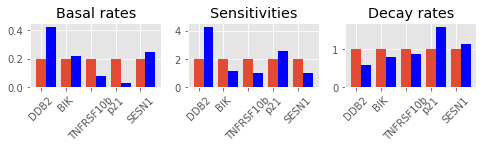

In [4]:
plotter = Plotter(model, m_df.index, t_inducing)
plotter.plot_kinetics()

torch.Size([5, 80])
mean (1, 80)


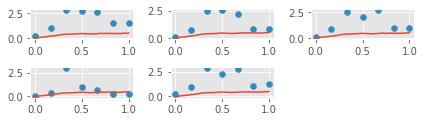

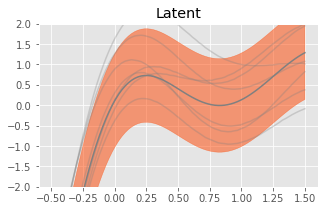

In [5]:
t_predict = torch.linspace(f64(0), f64(1), 80)
rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}

plotter.plot_genes(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_tfs()

Epoch 31/50 - Loss: 37.55 (31.39 6.16) b: 1.96 d 1.72 s: 4.66 λ: 0.079
Epoch 33/50 - Loss: 38.27 (32.11 6.16) b: 2.01 d 1.76 s: 4.69 λ: 0.077
Epoch 35/50 - Loss: 38.94 (32.75 6.19) b: 2.07 d 1.74 s: 4.72 λ: 0.078
Epoch 37/50 - Loss: 30.35 (24.15 6.20) b: 2.12 d 1.73 s: 4.71 λ: 0.078
Epoch 39/50 - Loss: 33.30 (27.15 6.15) b: 2.14 d 1.77 s: 4.66 λ: 0.078
Epoch 41/50 - Loss: 29.38 (23.34 6.04) b: 2.14 d 1.82 s: 4.59 λ: 0.078
Epoch 43/50 - Loss: 27.85 (21.93 5.92) b: 2.15 d 1.86 s: 4.52 λ: 0.078
Epoch 45/50 - Loss: 25.65 (19.85 5.80) b: 2.16 d 1.89 s: 4.46 λ: 0.078
Epoch 47/50 - Loss: 26.68 (20.99 5.69) b: 2.17 d 1.90 s: 4.42 λ: 0.078
Epoch 49/50 - Loss: 25.20 (19.61 5.59) b: 2.19 d 1.89 s: 4.39 λ: 0.078


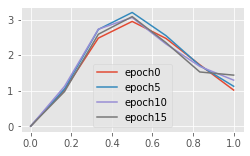

In [10]:
tol = 1e-3
# trainer = Trainer(optimizer)
output = trainer.train(20, rtol=tol, atol=tol/10,
                       report_interval=2, plot_interval=5, num_samples=4)

### Outputs after training

torch.Size([5, 80])
mean (1, 80)


C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


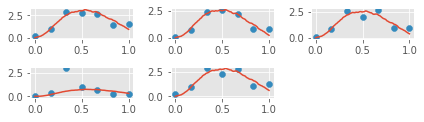

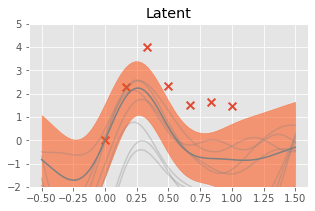

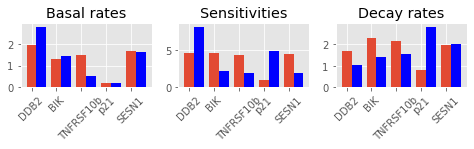

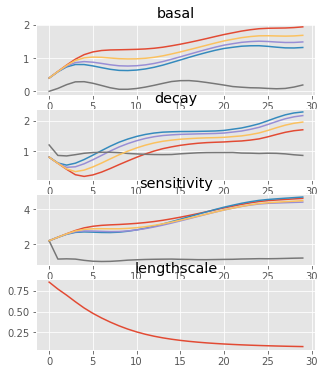

In [9]:
tol = 1e-3
plotter = Plotter(model, m_df.index, t_inducing)

# plot_losses(trainer)
plotter.plot_genes(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_tfs(ylim=(-2, 5), plot_barenco=True)
plotter.plot_kinetics()
plotter.plot_convergence(trainer)

In [ ]:
save(model, 'variational_linear')

In [ ]:
model = load('variational_linear', SingleLinearLFM, num_genes, num_tfs, t_inducing, t_observed)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))